# Grad-CAM : Visual representation of the decisions made by deep networks

In layman's term, Grad-CAM the abbreviation of ** Gradient-weighted Class Activation Mapping**, is a technique which will help us to understand why network predict what they do. You will pass an image and a class of interest (Tiger Cat for the below image) and network will give you a resultant image back with a given class region highlighted in the image. It can clearly represent where the network is looking while making some predictions. 

>>> >>> ![gradcam](https://github.com/bhgtankita/ML-DNN/blob/master/images/GRAD-CAM_images/Grad-CAM.PNG?raw=true)

<u>**Before we deep dive into technicality of the topic, let's check out illustration of [How self driving car sees the world](https://youtu.be/w6XHI1oIbOQ) which make use Grad-CAM technique. You can also try hand at [Grad-CAM demonstration](http://gradcam.cloudcv.org/classification).**

# Contents

>>[1.Why interpretability is important in Deep Neural Networks?](#scrollTo=vYhtVDpZ0nR0)

>>[2.Various Visualization techniques introduced prior to Grad-CAM](#scrollTo=hIVHi6oUTaJL)

>>>[2.1 Class Model Visualization](#scrollTo=G7oi9bwhuMUI)

>>>[2.2 Saliency Maps](#scrollTo=LbNDnHKfTokL)

>>>[2.3 Class Activation Maps](#scrollTo=d584HxarTt7m)

>>[3.What is Global Average Pooling?](#scrollTo=hAoxC4oYSwdq)

>>[4.Grad-CAM & Guided Grad-CAM : High resolution Class-discriminative  Visualization Techniques](#scrollTo=e62otHuvqhvW)

>>>[4.1 Paper key notes](#scrollTo=qvCSrVp_0HC5)

>>>[4.2 Architecture details](#scrollTo=SlMynoTqRNCO)

>>>[4.3 Mathematical Representation](#scrollTo=1LT6PN5yZDTn)

>>[5.Keras Visualization Toolkit](#scrollTo=l_OJFwRQtBjp)

>>[6.Weeknesses of Grad-CAM and further improvements](#scrollTo=qffuvn0EjBFJ)

>>[7.What is DenseNet?](#scrollTo=tNk-Bn6PU-cR)

>>>[7.1 Architecture of Densely Connected Networks](#scrollTo=sgA4QhoqWbrZ)

>>[8.Project details and Implementation approach](#scrollTo=XWqQzaXYq7Ft)

>>>[8.1 Grad-CAM implementation results based on different models](#scrollTo=iDLWI1SU5oZQ)

>>>[8.2 Grad-CAM implementation results for different convolution layers](#scrollTo=3GSEJo6F5n2N)

>>[9.Let's crack the code !](#scrollTo=WWOmmoH2XDG3)

>>>[9.1 Initialization](#scrollTo=3GeWFDhlMfR0)

>>>[9.2 Define Utility Functions](#scrollTo=c6GuHr4DHMrq)

>>>[9.3 Load and instantiate DenseNet121 model](#scrollTo=ojeFfjACcluc)

>>>[9.4 Apply image classifier on input image](#scrollTo=Im9nEOyPS20z)

>>>[9.5 Perform Grad-CAM and Guided Grad-CAM on image with maximum probability class](#scrollTo=FxFmeZcmT4Fn)

>>>[9.6 Perform visualization on a specific class](#scrollTo=t0Wa2R7cjKGY)

>>>[9.7 Perform Grad-CAM on video file](#scrollTo=w0LHed8y2Szd)

>>[10.Chellanges and Learnings](#scrollTo=ygHMekM4kVcT)

>>[11.Conclusion](#scrollTo=gfgWVEVVVvBY)

>>[12.References](#scrollTo=AQElX9zlVuYK)



## 1.Why interpretability is important in Deep Neural Networks?
<hr>

When deep networks make some decision, say when it is classifying an image, do you think that it can clearly differentiate objects in the image as we humans do? Well imagine, when we pass some input image to the neural network and it gives result with probability of given class being in that image, is it possible to give a clear-cut answer why network has predicted that object? In reality, this entire flow is really difficult to debug and referred as a black-box.
<br>
<br>
5 incidents where the need of transparency draw our attention :

1.   In the 1980s, [Pentagon](https://neil.fraser.name/writing/tank/) was running a project with use of neural network, which can identify camouflaged tanks. With the use of digital cameras, it was continuously scanning situation outside of the tanks for possible threats.  The program got 100% accuracy on training dataset but it failed completely when a different set of images fed into model for testing. The reason of failure was, half of the training dataset images were taken on a sunny day and other images captured on a cloudy day. So rather learning tank pattern, network learned to differentiate the images based on the color of sky.
<br>
2.  [Tesla driver dies in first fatal crash while using autopilot mode](https://www.theguardian.com/technology/2016/jun/30/tesla-autopilot-death-self-driving-car-elon-musk)
3.   [Uber self-driving car drives through red light in San Francisco](https://www.theguardian.com/technology/2016/dec/14/uber-self-driving-cars-run-red-lights-san-francisco)
4.  [Self-driving Uber kills Arizona woman in first fatal crash involving pedestrian](https://www.theguardian.com/technology/2018/mar/19/uber-self-driving-car-kills-woman-arizona-tempe)
5.  European Union General Data Protection Regulation's has extended the automated decision-making rights with the new regulation, which is also presented in [paper](https://arxiv.org/pdf/1606.08813.pdf).
<br>
> **"Whenever human subjects have their lives significantly impacted by an automatic decision making machine, the human subject has the right to know why the decision is made- i.e. right to explanation."** 

With growing success of Neural Networks, it is very much important for us to be able to explain their decisions. And in order to build trust in the intelligent systems, we must build transparent models.

## 2.Various Visualization techniques introduced prior to Grad-CAM
<hr>

Visualization can communicate useful information about what a network is learning. Let's understand few such techniques for visualizing workings pattern of the neural network.

> ###  **2.1 Class Model Visualization** 

>> **Objective : **
*  Generate an image which will best represent the given class or category.

>> **Approach :**
* To find the image $I$ which maximizes the score $S_c(I)$ for a  category $c$, we will compute the gradient with respect to $I$ using back-propagation, and then use gradient ascent to find a better $I$. We will repeat the process until we find a locally optimal for $I$.
* we’re optimizing the image, keeping the weights fixed.

>> **Mathematical representation :** $\boxed{argmax$_IS_c(I)}$
 
 >> **More details : **[paper](https://arxiv.org/pdf/1312.6034.pdf)

>>> >>> ![](https://github.com/bhgtankita/ML-DNN/blob/master/images/GRAD-CAM_images/Class%20Model%20Vis.PNG?raw=true).





> ### 2.2 Saliency Maps

>> **Objective : **
* Find the pixels of an image which contribute most towards a particular classification.

>> **Approach :**
* We’re going to take the derivative of the class score $S_c$ with respect to the input image space $I$, and evaluate on our image $I_0$.
* We are going to take the magnitude of scalar values and then normalize them to get a class saliency map $M_c$ over the image.

>> **Mathematical representation :**  $\boxed{M_c(i , j) = \frac{w_{ij}}{\sum_{ij}{w_{ij}}}}$    
>>> >>> > Where,
>>> >>>+ $w_{ij}^c$ = $\frac{\partial{S_c}}{\partial{I}}|_{I_0}$, scalar quantity at location (i , j) for class $c$

>> **More details :** [paper](https://arxiv.org/pdf/1312.6034.pdf),  [code sample](https://github.com/bhgtankita/ML-DNN/blob/master/VGG/Saliency.ipynb)

>>> >>> <center>
![](https://github.com/bhgtankita/ML-DNN/blob/master/images/GRAD-CAM_images/Saliency.PNG?raw=true)
</center>

>  ### 2.3 Class Activation Maps
> > **Objective : **
* Generate a class activation map for a particular category, which indicates the discriminative image regions used by the CNN to identify that category.

>> **Approach :**
* In this technique we are modifying the base network to remove all fully-connected layers at the end, and including a tensor product followed by softmax. This tensor product is generated by using Global Average Pooing (refer [section 3](#scrollTo=hAoxC4oYSwdq) to understand GAP).
>>> >>> > ![](https://github.com/bhgtankita/ML-DNN/blob/master/images/GRAD-CAM_images/CAM1.PNG?raw=true)
* As we are changing the architecture here, network should be retrained. This sometimes lead to a decrease in accuracy.
* Due to global Average Pooling, we can use different input image sizes.
* We are not only using this architecture for classification, but we are also producing saliency map for visualization. 
* Overall architecture can be depicted as below.
>>> >>> ![](https://github.com/bhgtankita/ML-DNN/blob/master/images/GRAD-CAM_images/CAM2.PNG?raw=true)

>> **Mathematical representation :**  $\boxed{S_c = \sum_k{w_c^k}\sum_{i, j}f_k{(i , j)}}$

>>> >>> > Where, 
>>> > + $f_k{(i , j)}$ = activation at the $(i,j)$th location in feature map $k$
<br>
>>> > + $\sum_{i, j}f_k{(i , j)}$ = summing up the activations within each feature map
<br>
>>> >+ $w_k^c$ = weights which are learnt by taking a weighted average across the feature maps
<br>
>>> >+ $S_c$ = score for each class

>>> >>> > $\boxed{M_c{(i , j)} = \sum_k{w_c^k f_k{(i , j)}}}$

>>> >>> >+ Here we are using the learned weight vectors $w_k^c$ to take a weighted average of each of the feature maps.

>> **More details :** [paper](https://arxiv.org/pdf/1512.04150.pdf),  [What the CNN is looking](https://www.youtube.com/watch?v=fZvOy0VXWAI), [Places Demonstration](http://places2.csail.mit.edu/demo.html)

>>> >>> ![](https://github.com/bhgtankita/ML-DNN/blob/master/images/GRAD-CAM_images/CAM.PNG?raw=true)

## 3.What is Global Average Pooling? 
<hr>

The traditional neural network classifiers have convolution layers in the beginning. For the classifications output of convolution is vectorized and fed into fully connected layers which will be followed by a softmax layer with the prediction of class probability. Global Average Pooling will be used to remove fully connected layers from Convnet as they are responsible to overfitting.
Instead of adding fully connected layers on top of the feature maps, we take the average of each feature map, and the resulting vector is fed directly into the softmax layer.

> Why GAP is popular?
> *   More native to the convolutional structure
> *   No parameter to optimize 
> *   Overfitting is avoided
> *   More robust to spatial translations of input
> *   Allows flexibility in input size

>>> > ![](https://github.com/bhgtankita/ML-DNN/blob/master/images/GRAD-CAM_images/GAP.PNG?raw=true)

## 4.Grad-CAM & Guided Grad-CAM : High resolution Class-discriminative  Visualization Techniques
<hr>

Grad-CAM is a technique, which uses the gradients of any target class, say score for the ‘dog’ or even a caption, flowing into the final convolutional layer to produce a coarse localization map highlighting the important regions in the image for predicting the concept. 
<br><br>
The visualization of features directly can be less informative. Hence, we use the training procedure of backpropagation to activate the filters for better visualization. Since we pick what neurons are to be activated for backpropagation, it is called guided backpropagation. We will fuse Guided Backpropagation and the Grad-CAM visualizations via a pointwise multiplication, to achieve Guided Grad-CAM result.
<br><br>
You can read the original paper [here](https://arxiv.org/pdf/1610.02391v1.pdf).


> ### 4.1 Paper key notes

> *  Grad-CAM technique is highly class-discriminative i.e. 'cat' representation exclusively highlights the cat region and not the dog region and vice versa.

> * Though it is class-discriminative, it can not show the fine-grained details in the image. The reason is the size of final convolution layer in CNN, which is typically very small. e.g. 14x14 in VGGNet, 7x7 in DenseNet 

> *  To produce high-resolution class-discriminative output, it fuses pixel gradient visualizations such as Guided backpropagation or Deconvolution, with Grad-CAM and generate Guided Grad-CAM representation. 

> *  [Guided backpropagation](#scrollTo=8xZLV5uqI8I1) technique is being used to implement pixel gradient visualization because it is noise-free.

> *  The best part is, no need to retrain the network.  

> *  Grad-CAM is a strict generalization of the CAM technique. While CAM is limited to a narrow class of CNN models as it requires feature maps to directly precede softmax layers, Grad-CAM is broadly applicable to any CNN-based architecture.  For a fully-convolutional
architecture, Grad-CAM reduces to CAM by ignoring rectification/normalization
for visualization purposes.

> *  This technique can be implemented using a single forward and a partial backward pass per image. 

> *  Not only image classification, it can also be used for image captioning and VQA (Visual Question Answering) using CNN and LSTM models.

> ### 4.2 Architecture details

>> **Grad-CAM :**
> * We are calculating gradients of a class logit with respect to activation maps corresponding to the final convolutional layer.
> *  Then we are taking the weighted average of these activation maps by using the gradients as weights.
> *  Finally, we are applying ReLU to highlight regions that positively correlates with the chosen class.
> *  Projecting the obtained result back to the input space in the form of heatmaps (coarse localization maps). 
> * The generated image is highly class-discriminative and localize relevant image regions well, but they lack the ability to show fine-grained importance.

>> **Guided Grad-CAM :**
> * We have to generate an image which is class discriminative as well as high in resolution.  
> * To achieve this, we are going to implement guided backpropagation and blend the generated image with Grad-CAM resultant image.  
> * In guided backpropagation while propagating the gradient, we set all the
negative gradients to 0. Which means we are propagating only the weights which are positive and all the activations which are greater than 0 along the back.
> * To generate Guided Grad-CAM result we have to perform pointwise multiplication between Grad-CAM and Guided back propagation results. 


> ![](https://github.com/bhgtankita/ML-DNN/blob/master/images/GRAD-CAM_images/Grad-CAM_ARCH.png?raw=true)

>> **Backpropagation Vs Deconvolution Vs. Guided Backpropagation :**

>> * Guided Backpropagation seems to have a clear advantage over the plain gradient or the Deconvolution in terms of generating high resolution which shows fine grained details in the image.
>> * During plain backpropagation we are considering both the paths which have positive and negative influence on the output class score and these end up cancelling out in a weird interference pattern, causing gradients to seem noisy. while in [Guided backpropagation](#scrollTo=8xZLV5uqI8I1), we only keep paths that lead to positive influence on the class score, and suppress the ones that have negative influence, leading to much cleaner looking images.
>> * To implement pixel gradient visualization, Guided backpropagation is chosen over Deconvolution because it produces noise-free visualization. Another reason is Deconvolution led to non-discriminative localizations while Guided backpropagation led to somewhat discriminative localization.

>>> >> ![](https://github.com/bhgtankita/ML-DNN/blob/master/images/GRAD-CAM_images/Architectural_decision.PNG?raw=true)



> ### 4.3 Mathematical Representation

> * To derive the class-discriminative localization map, we are calculating gradient of $y^c$ with respect to feature map A of a convolution layer.

> * To obtain important weights $\alpha_c^k$, now we take the average of gradients which are flowing back. It is just a single backward call till the convolutional layer.

> * Generated weights $\alpha_c^k$ represents a partial linearization of deep network downstream from $A$.

$$\boxed{\alpha_c^k = \overbrace{\frac{1}{Z}\sum_i\sum_j}^{\text{global average pooling}} \underbrace{\frac{\partial{y^c}}{\partial{A_{ij}^k}}}_{\text{gradients via backprop}}}$$

>>> >>> Where,

>>> >>> $y^c$  = score for class c
<br>
>>> >>> $A_{ij}^k$ = feature maps of last convolution layer
<br>
>>> >>> $\alpha_c^k$ = weights, which captures the importance of feature map k for a target class c

> * We will now take the linear combination of feature maps followed by the ReLU. 

> * As we are only interested in the features that have a positive influence on the class of interest, i.e. pixels whose intensity should be increased in order to increase $y^c$, ReLU is the best choice here. Negative values are for the pixels those are likely to belong to another category in the image, so we get rid of it by using ReLU.


$$\boxed{L_{Grad-CAM}^c = ReLU {\underbrace{(\sum_k\alpha_k^cA^k)}_{\text{linear combination}}}}$$

>>> >>> Where,

>>> >>> $L_{Grad-CAM}^c$ = localization map for class $c$

> * The generated heat-map is of the same size as convolutional feature maps, which is 7x7 in DenseNet.


## 5.Keras Visualization Toolkit
<hr>

keras-vis is a toolkit for visualizing and debugging our trained keras neural net models. We can directly make use of these APIs instead writing the code manually for visual representation. This toolkit supports 3 visualizations techniques :

>>  1.   Activation maximization
>>  *   Saliency maps
>>  *   Gradient-weighted Class activation maps

Refer this toolkit document [link](https://raghakot.github.io/keras-vis/) for detail information.

As we are interested in Grad-CAM implementation, below are the exposed APIs. 

*   **visualize_cam**:- general purpose API for visualizing grad-CAM.

*   **visualize_cam_with_losses**:- intended for research use-cases where some custom weighted loss can be used.

There are few newly added APIs in package 0.3.2 for grad-cam custom loss functions. API toolkit Document is not yet updated with latest information.  

*   **visualize_class_cam**
*   **visualize_regression_cam**

<br>
Check out ***Self driving toy car demonstration*** implementation by [experiencor](https://github.com/experiencor/self-driving-toy-car), which make use of **visualize_regression_cam** API and [raghakot](https://github.com/raghakot/keras-vis/tree/master/applications/self_driving) which utilize **visualize_cam** API, for Grad-CAM implementation.

## 6.Weeknesses of Grad-CAM and further improvements
<hr>
**Weaknesses of Grad-CAM: **
1. Multiple occurrences of the same class (Rows 1&2)
2. Localization capability of an object in an image (Rows 3&4)
<br>  
   
> According to [paper](https://arxiv.org/abs/1710.11063) released in October 2017, Grad-CAM++ technique gives better localization and visual representation. Below illustration is taken from the Grad-CAM++ paper, which compares results from both the techniques.
<br><br>    

   > ![](https://github.com/bhgtankita/ML-DNN/blob/master/images/GRAD-CAM_images/Grad-CAM++.PNG?raw=true)


## 7.What is DenseNet?
<hr>
If you are already familiar with DenseNet architecture, you can directly jump to [Section 8](#scrollTo=XWqQzaXYq7Ft). 

DenseNet has achieved significant success in many applications. However, deep models are
hard to train and require longer times to converge. Let's see some of the architectural properties of DenseNet.
<br>
*   Each layer's feature map is concatenated to the input of every successive layer which allows feature reuse within network and Strengthen feature propagation.
*   It uses skip connections which is convenient to make gradient
flow easily and overcome the overfitting. It is having multi-layer-skipping structure which proved to have better performance.
*   It is not having fully connected layers which will help to reduce number of parameters and computations. 
*   Solves vanishing-gradient problem. It is proven more efficient on some image classification benchmarks.
*   DenseNet uses a lot more memory, so it is preferred in case of small dataset.

> Mathematically it can be represented as :  $\boxed{x_l = H_l([x_0,x_1,...,x_{l-1}])}$

> Where, [$x_0$,$x_1$,...,$x_l-1$]  refers to the concatenation of the feature maps produced in layers 0 , ... , ${l-1}$ and $H$ means stacking over the depth dimension.

You can refer original [paper](https://arxiv.org/abs/1608.06993) which has received CVPR 2017 Best Paper Award.


> ### **7.1 Architecture of Densely Connected Networks**

> *   Between each dense block there is a transition block.
> *   Feature map sizes match within each block.
> *   Pooling is used to reduce feature map size.

>> ![](https://cdn-images-1.medium.com/max/1200/1*SSn5H14SKhhaZZ5XYWN3Cg.jpeg)
<br>

> * Imagine we have an image with shape(28, 28, 3). First, we spread image to initial 24 channels and receive the image (28, 28, 24). 
> * Every next convolution layer will generate k=12 features, and remain width and height same. The output from $L_i$ layer will be (28, 28, 12). But input to the $L_{i+1}$ will be (28, 28, 24+12), for $L_{i+2}$ (28, 28, 24 + 12 + 12) and so on. 
> * After a while, we receive the image with same width and height, but with plenty of features (28, 28, 48). These N layers are referred as ***Dense Block***. 
> * There is also batch normalization, nonlinearity and dropout inside the block.

>>> >> ![DenseNet](https://cdn-images-1.medium.com/max/1200/1*6JoB4BeIZyWDNGH5U63y_Q.png)
<br>

> * ***Transition Layers*** are used to reduce the size. These layers contain convolution with kernel size = 1, followed by 2x2 average pooling with stride = 2. 
> * It reduces height and width dimensions but leaves feature dimension the same. As a result, we receive the image with shapes (14, 14, 48).

>>> >>> >> ![](https://cdn-images-1.medium.com/max/1200/1*-CQyW4huxxxMYpffb72emg.png)

> * Now we can again pass the image through the block with N convolutions. 
> * With this approach, DenseNet improved a flow of information and gradients throughout the network. Each layer has direct access to the gradients from the loss function and the original input signal.
<br><br>
<u>**Various DenseNet Architectures : ** </u>
* Growth rate k = 32
* each convolution layer shown in the table corresponds the sequence BN-ReLU-Conv
>>> ![](https://github.com/bhgtankita/ML-DNN/blob/master/images/GRAD-CAM_images/DenseNet.PNG?raw=true)

## 8.Project details and Implementation approach
<hr>

* This iPython notebook is implementation of [paper](https://arxiv.org/pdf/1610.02391v1.pdf), which beautifully demonstrate the visual representation of where CNN is looking.

* For the implementation of Grad-CAM, we have taken reference of the code implemented by [jacobgil](https://github.com/jacobgil/keras-grad-cam).

* The original paper uses VGG16 imagenet pretrained weights for Grad-CAM implementation. Here we are using DenseNet121 for better classification and localization.

*  For this implementation, we are using Keras DenseNet application with imagenet pretrained weights.

    *   Image size : 224x224
    *   Channels    : 3
    *   Classes      : 1000
    
* **Why are we using DenseNet121?**
  1. DenseNet gives better classification accuracy with less number of parameters. Refer below image with models performace table. 

  2. Features which are extracted at very early layers are, directly used by deep layers throughout the same dense block. Which means it contains a feature layer (convolutional layer) capturing low-level features from images. In a simple terms, VGG doesn't consider that grass is green (which is something that you can infer from initial layer activations) while detecting the playground, but Densenet can do it. That's why DenseNet is a good feature extractor for various computer vision tasks that build on convolutional features.
  
>> <u>**Models performance on the ImageNet validation dataset :**</u>

>> ![](https://github.com/bhgtankita/ML-DNN/blob/master/images/GRAD-CAM_images/CNN_Architecture_Performance_.PNG?raw=true)
    
* We are using output of the final convolutional layer in DenseNet121 which is 'conv5_block16_concat'. The resulting feature map is of shape 7x7x1024.




> ### 8.1 Grad-CAM implementation results based on different models

> * Here I have executed Grad-CAM technique with different models to choose the best one.

> * DenseNet gives quite reliable classification accuracy compare to VGG.

> * Based on below experiment results, it seems DenseNet121 can well localize the target class. And it has less parameters and less number of layers compare to DenseNet201, which can help us to speed up the execution.

> * Refer [Source code](https://github.com/bhgtankita/ML-DNN/tree/master/Grad-CAM%20implementation/Model%20architecture%20decision) for these implementation.

>>> ![](https://github.com/bhgtankita/ML-DNN/blob/master/images/GRAD-CAM_images/Model_Compare.PNG?raw=true)

> ### 8.2 Grad-CAM implementation results for different convolution layers

> * In Grad-CAM, we are calculating gradients of a class score with respect to activations of convolution layer. 
> * Here I have tried using different convolution layers of the model and recorded the results. 
> * I have observed that heatmap of last layers are class discriminative. As we are moving towards earlier convolution layers localization is getting worse.
> * The reason is later convolution layers capture high-level semantic information and retain spatial information, while the shallower layers have smaller receptive fields and can only concentrate on local features which are important for the next layer.
<br>
>>> >>> ![](https://github.com/bhgtankita/ML-DNN/blob/master/images/GRAD-CAM_images/ConvLayer_result.PNG?raw=true)

> * I have picked few random layers from later Dense and Transition blocks to check the behavior. But results were not satisfactory. 

>>> >>> ![](https://github.com/bhgtankita/ML-DNN/blob/master/images/GRAD-CAM_images/Other_Conv_Results.PNG?raw=true)

> * The result of using Last Convolution layer "**conv5_block16_concat**" with 1024 feature maps and second last layer ''**conv5_block16_2_conv**'' with 32 feature maps, were almost identical. 

> * That's the reason we are using penultimate layer "**conv5_block16_concat**" to find out the gradients of class.


## 9.Let's crack the code !
<hr>



+ Initialization
    
    + We are using ImageNet-trained DenseNet121 network.

    + We are using keras library for it which is made available alongside pre-trained weights. 
    
    + The default input size for this model is 224x224.
    
    + No need to retrain the network as we are not modifying the existing model structure.

+ Define Utility Functions
 
+ Load and instantiate DenseNet121 model

+ Apply image classifier on input image

+ Perform Grad-CAM and Guided Grad-CAM on image with maximum probability class

+ Perform visualization on a specific class

+ Perform Grad-CAM on video file

### 9.1 Initialization

In [0]:
from keras.applications.densenet import (
    DenseNet121, preprocess_input, decode_predictions)
from keras.preprocessing import image
from keras.layers.core import Lambda
from keras.models import Sequential
from tensorflow.python.framework import ops
import keras.backend as K
import tensorflow as tf
import numpy as np
import keras
import sys
import cv2

Using TensorFlow backend.


### 9.2 Define Utility Functions

<u>**Creating a target function**</u>

* The output of grad-cam will be pixels that contribute to the maximization of below target function. 

* If for example we are interested in what maximizes category number 20, then zero out all the other categories. Below function implements same.

In [0]:
""" 
    If we are considering category "bull_mustiff" which is having highest probability, we are computing one-hot encoding representation for that class.
    Then applying elementwise multiplication operation
"""

def target_category_loss(x, category_index, nb_classes):    
    return tf.multiply(x, K.one_hot([category_index], nb_classes))

In [0]:
"""
    Returning shape for the input tensor
"""

def target_category_loss_output_shape(input_shape):
    return input_shape

In [0]:
"""
    calculating RMS (root mean square) and normalize a tensor by its L2 norm
"""    

def normalize(x):
    return x / (K.sqrt(K.mean(K.square(x))) + 1e-5)

<u>**Loading and preprocessing the image**</u>

* We are loading a PIL image with target size (224, 224).

* Converting image to an array and adding extra dimension for batch size.

* Normalizing the image by subtracting mean RGB values from the input image using a helper function preprocess_input.

In [0]:
def load_image(path):
    img_path = path
    img = image.load_img(img_path, target_size=(224, 224))
    original_image = image.img_to_array(img)   #""" shape (224, 224, 3) """
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)     #""" transforming the array : shape (1, 224, 224, 3) """
    x = preprocess_input(x)           #""" channel-wise color normalization """   
    return original_image, x

<u>**Registering Gradients for ReLU :**</u>

* In below piece of code, we are implementing custom gradient function, which changes the gradients for all ReLu activations according to Guided Backpropagation.  
* As gradients for ReLU is not included in Tensorflow, we need to implement it manually. 
* Because we are implementing Gradient function for a new mathematical operation, it has to inherit from Decop and its gradient has to be “registered” (RegisterGradient).


In [0]:
"""
    register gradients for ReLU
"""

def register_gradient():    
    if "GuidedBackProp" not in ops._gradient_registry._registry:
        @ops.RegisterGradient("GuidedBackProp")
        def _GuidedBackProp(op, grad):
            dtype = op.inputs[0].dtype      # """ op.inputs[0] contains the forward-pass value of the op; dtype = datatype """
            return grad * tf.cast(grad > 0., dtype) * \
                tf.cast(op.inputs[0] > 0., dtype)

<u>**Computing Saliency Maps**</u>

* Below is the helper function for computing the saliency map.
* It is computing the gradient of the activation layer which is 'conv5_block16_concat' with respect to the input image. 
* Moreover we are interested in the gradient of predicted class, which means we will pick maximum activations from the convolution layer. 

In [0]:
"""
    Compiles a function to compute the saliency maps and predicted classes
    for a given minibatch of input images.
"""
  
def compile_saliency_function(model, activation_layer='conv5_block16_concat'):    
    input_img = model.input
    layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])
    layer_output = layer_dict[activation_layer].output
    max_output = K.max(layer_output, axis=3)     # """Picking the maximum activations from the channels"""
    saliency = K.gradients(K.sum(max_output), input_img)[0]
    return K.function([input_img, K.learning_phase()], [saliency])

<u>**Guided Backpropagation :**</u>

* We are implementing Guided backpropagation in below helper function, which will help us to visualize which pixels are important for the particular output of the network.

>>> >>> >>> **Representation of Guided Grad-CAM**

>>> >>> >>> ![](https://github.com/bhgtankita/ML-DNN/blob/master/images/GRAD-CAM_images/Guided%20Backprop.png?raw=true)

* As illustrated in the image, X is the input image pixels and Pm is the output class with highest probability. The objective here is to explain why output Pm is high. It can be explained using Guided backpropagation. This technique is computing the gradient of Pm with respect to input, except it is only taking into account path between each X and Pm where all the weights are positive and all the activations are greater than 0 along the back. Any path which is not like that is just being ignored here.

* We are overriding gradient of a ReLU operation with the newly implemented gradient 'GuidedBackProp'. We are updating only gradients as we want nothing to be happen in the forward pass. 



In [0]:
"""
    This Function is overriding the gradients of a Relu operation with our newly registered gradient 
    It is returning modified model
"""
def modify_backprop(model, name):
    g = tf.get_default_graph()
    with g.gradient_override_map({'Relu': name}):

        # get layers that have an activation
        layer_dict = [layer for layer in model.layers[1:]
                      if hasattr(layer, 'activation')]

        # replace relu activation
        for layer in layer_dict:
            if layer.activation == keras.activations.relu:
                layer.activation = tf.nn.relu

        # re-instantiate a new model
        new_model = DenseNet121(weights='imagenet')
    return new_model

<u>**Deprocessing on the Image :**</u>

* We are performing normalization on the image with means subtraction and adjusting the standard deviation.
* Then filters can be scaled back and clipped to the gradient values.

In [0]:
"""
    Normalization on the image
"""
def deprocess_image(x):

    if np.ndim(x) > 3:
        x = np.squeeze(x)
        
    # normalize tensor: center on 0., std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_dim_ordering() == 'th':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

<u>**Utility function for Grad-CAM implementation :**</u>

*  We are adding an extra layer to the DenseNet121 model, which is having score for the class of interest and all other classes probability is set to 0.

* Deriving a loss value, to compute the gradient of it with respect to convolutional layer (conv5_block16_concat) output.

*  Pooling channel wise gradients and taking average for each feature map.

*  Calculating weight of feature map.

* Applying ReLU to get the positive influence activations for the intended class output.

*  Generating heatmap and overlaying it to the original image to generate Grad-CAM result.

In [0]:
def grad_cam(input_model, image, origin_image, category_index, layer_name):
    
    """ Input Paramaters
       Input_model -> DenseNet121 model
       image -> preprocessed image
       original_image -> orginal image array without applying preprocess_input
       category_index -> class we are interested in (eg. 243 = bull_mustiff)
    """

    model = Sequential()
    model.add(input_model)
    
    
    """ Instantiating a model with an additional layer. This additional layer will consider
    probability of target class (e.g. 243 = bull_mustiff) and setting other class probability to 0 """
    
    nb_classes = 1000
        
    target_layer = lambda x: target_category_loss(x, category_index, nb_classes)
    x = input_model.layers[-1].output # Fully Connected layer - fc1000 
    x = Lambda(target_layer, output_shape=target_category_loss_output_shape)(x)
    model = keras.models.Model(input_model.layers[0].input, x) # Instantiate a Model
    loss = K.sum(model.layers[-1].output)
     
    """ Debugging code
    
    # model.summary()    
    # A new layer is added after fully connected layer
    
    # __________________________________________________________________________________________________
    # fc1000 (Dense)                  (None, 1000)         1025000     avg_pool[0][0]                   
    # __________________________________________________________________________________________________
    # lambda_15 (Lambda)              (None, 1000)         0           fc1000[0][0]
    
    """ 
    
 
    """ Computing gradients of the above calculated loss with respect to the convolutional layer 
    (conv5_block16_concat) outputs with the help of backpropagation.  """

    conv_output = [l for l in model.layers if l.name == layer_name][0].output    
    grads = normalize(K.gradients(loss, conv_output)[0]) # normalize to adjust the values between 0 and 1
    gradient_function = K.function([model.layers[0].input], [conv_output, grads])
    output, grads_val = gradient_function([image]) # Output is the Numpy array -> (1, 7, 7, 1024)   
    output, grads_val = output[0, :], grads_val[0, :, :, :] # removing a dimension for "batch size" -> (7, 7, 1024)


    
    """ pooling the gradients over all the axes leaving out the channel dimension and taking average of each feature map. 
    Finally, we are weighing the output feature map with the computed gradient values.
    It generates (7, 7) image array which we are resizing to match with input image size  """
    
    weights = np.mean(grads_val, axis = (0, 1))
    cam = np.ones(output.shape[0 : 2], dtype = np.float32)
    for i, w in enumerate(weights):
        cam += w * output[:, :, i]
    cam = cv2.resize(cam, (224, 224)) # resize (7, 7) image to (224, 224)
    
    
    
    """ Applying ReLU to keep the pixels those have a positive influence on the target function.
    Summing up all the scaled channels to obtain the a heatmap """
    
    cam = np.maximum(cam, 0)    
    heatmap = cam / np.max(cam)     
    
    cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
    cam = np.float32(cam) + np.float32(origin_image)
    cam = 255 * cam / np.max(cam)
    
    heatmap_print = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
    
    return np.uint8(cam), heatmap, heatmap_print
   

### 9.3 Load and instantiate DenseNet121 model

In [0]:
"""
    Uploading the image on Google Colab
"""

from google.colab import files
uploaded = files.upload()

Saving dog_cat.jpeg to dog_cat.jpeg


In [0]:
original_input, preprocessed_input = load_image('dog_cat.jpeg')
model = DenseNet121(weights='imagenet')         #""" loading pretrained weights with instantiation """
model.summary()

34119680/34115984 [==============================] - 2s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________


__________________________________________________________________________________________________
conv4_block17_concat (Concatena (None, 14, 14, 800)  0           conv4_block16_concat[0][0]       
                                                                 conv4_block17_2_conv[0][0]       
__________________________________________________________________________________________________
conv4_block18_0_bn (BatchNormal (None, 14, 14, 800)  3200        conv4_block17_concat[0][0]       
__________________________________________________________________________________________________
conv4_block18_0_relu (Activatio (None, 14, 14, 800)  0           conv4_block18_0_bn[0][0]         
__________________________________________________________________________________________________
conv4_block18_1_conv (Conv2D)   (None, 14, 14, 128)  102400      conv4_block18_0_relu[0][0]       
__________________________________________________________________________________________________
conv4_blo

### 9.4 Apply image classifier on input image

In [0]:
predictions = model.predict(preprocessed_input)
predicted_class = np.argmax(predictions)        #""" class with highest probability """

top_1 = decode_predictions(predictions)[0][0]
print('Top Predicted class: %s (%s) with probability %.2f' % (top_1[1], top_1[0], top_1[2]))

topK = 50
decoded = decode_predictions(predictions, top=topK)[0]   #Decodes the prediction of an ImageNet model

40960/35363 [==================================] - 0s 1us/step
Top Predicted class: Labrador_retriever (n02099712) with probability 0.58


### 9.5 Perform Grad-CAM and Guided Grad-CAM on image with maximum probability class

In [0]:
"""
    Performing Grad-CAM on input image
"""

cam, heatmap, heatmap_print = grad_cam(model, preprocessed_input, original_input, predicted_class, "conv5_block16_concat")
cv2.imwrite("gradcam.jpg", cam)               #""" Generating heatmap with overlay on input image """
cv2.imwrite("heatmap.jpg", heatmap_print)     #""" Generating heatmap """

True

In [0]:
"""
    Performing Guided Grad-CAM on input image
"""

register_gradient()
guided_model = modify_backprop(model, 'GuidedBackProp')
saliency_fn = compile_saliency_function(guided_model)
saliency = saliency_fn([preprocessed_input, 0])
gradcam = saliency[0] * heatmap[..., np.newaxis]
cv2.imwrite("guided_gradcam.jpg", deprocess_image(gradcam))

True

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Text(0.5,1,'Guided Grad-CAM for Labrador')

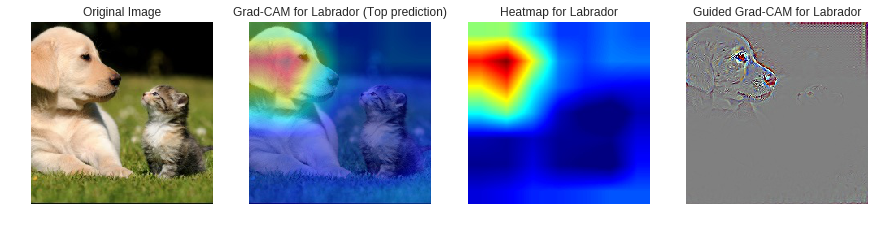

In [0]:
"""
    Visualization of result
      1. Original Image
      2. Grad-CAM result
      3. Heatmap result
      4. Guided Grad-CAM result
"""

from matplotlib import pyplot as plt
from skimage import io
from skimage.transform import resize
fig, axs = plt.subplots(1,4,figsize=(15,5))

img = io.imread('dog_cat.jpeg')
image = resize(img, (224, 224))
axs[0].imshow(image)
axs[0].axis('off')
axs[0].set_title('Original Image')

img = io.imread('gradcam.jpg')
axs[1].imshow(img)
axs[1].axis('off')
axs[1].set_title('Grad-CAM for Labrador (Top prediction)')

img = io.imread('heatmap.jpg')
axs[2].imshow(img)
axs[2].axis('off')
axs[2].set_title('Heatmap for Labrador')

img = io.imread('guided_gradcam.jpg')
axs[3].imshow(img)
axs[3].axis('off')
axs[3].set_title('Guided Grad-CAM for Labrador')

### 9.6 Perform visualization on a specific class

* we can compute map for any of the class being available in input image.


In [0]:
"""
    Deriving class index by feeding in class name
"""

class_names = ['Labrador_retriever', 'tiger_cat']
topK_ndx = []
imagenet_ndx = [] # indexes into the softmax entries of final layer

topK_synsets = [triple[0] for triple in decoded]
topK_names = [triple[1] for triple in decoded]
topK_scores = [triple[2] for triple in decoded]

for i, name in enumerate(class_names):
    ndx = topK_names.index(name)
    topK_ndx.append(ndx)
    imagenet_ndx.append(np.argwhere(predictions[0] == topK_scores[ndx])[0][0])
print('Class indexes for ["Labrador_retriever", "tiger_cat"] = ', imagenet_ndx)

Class indexes for ["Labrador_retriever", "tiger_cat"] =  [208, 282]


In [0]:
"""
    Performing Grad-CAM for CAT
"""

predicted_class = 282 # tiger_cat
cam, heatmap, heatmap_print = grad_cam(model, preprocessed_input, original_input, predicted_class, "conv5_block16_concat")
cv2.imwrite("gradcam_Cat.jpg", cam)
cv2.imwrite("heatmap_cat.jpg", heatmap_print)

True

In [0]:
"""
    Performing Guided Grad-CAM for CAT
"""

register_gradient()
guided_model = modify_backprop(model, 'GuidedBackProp')
saliency_fn = compile_saliency_function(guided_model)
saliency = saliency_fn([preprocessed_input, 0])
gradcam = saliency[0] * heatmap[..., np.newaxis]
cv2.imwrite("guided_gradcam_Cat.jpg", deprocess_image(gradcam))

True

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Text(0.5,1,'Guided Grad-CAM for Cat')

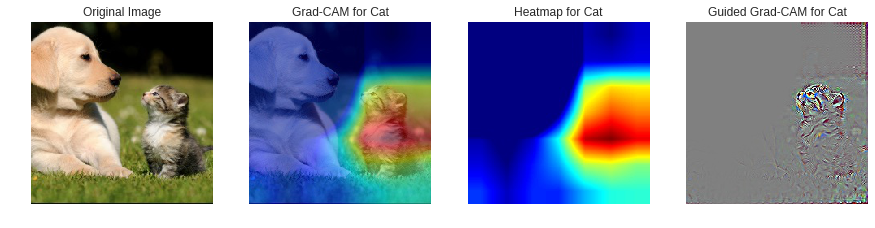

In [0]:
"""
    Visualization of result
      1. Original Image
      2. Grad-CAM result
      3. Heatmap result
      4. Guided Grad-CAM result
"""

from matplotlib import pyplot as plt
from skimage import io
from skimage.transform import resize
fig, axs = plt.subplots(1,4,figsize=(15,5))

img = io.imread('dog_cat.jpeg')
image = resize(img, (224, 224))
axs[0].imshow(image)
axs[0].axis('off')
axs[0].set_title('Original Image')

img = io.imread('gradcam_Cat.jpg')
axs[1].imshow(img)
axs[1].axis('off')
axs[1].set_title('Grad-CAM for Cat')

img = io.imread('heatmap_cat.jpg')
axs[2].imshow(img)
axs[2].axis('off')
axs[2].set_title('Heatmap for Cat')

img = io.imread('guided_gradcam_Cat.jpg')
axs[3].imshow(img)
axs[3].axis('off')
axs[3].set_title('Guided Grad-CAM for Cat')

### 9.7 Perform Grad-CAM on video file

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Input.mp4 to Input.mp4


* **Installing the dependencies for opencv and ffmpeg**

In [0]:
!apt-get install ffmpeg
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2
!pip install -q tqdm
from tqdm import tqdm

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  dbus i965-va-driver libaacs0 libapparmor1 libasound2 libasound2-data libass9
  libasyncns0 libavc1394-0 libavcodec57 libavdevice57 libavfilter6
  libavformat57 libavresample3 libavutil55 libbdplus0 libbluray2
  libboost-filesystem1.62.0 libboost-system1.62.0 libbs2b0 libcaca0 libcairo2
  libcapnp-0.5.3 libcdio-cdda1 libcdio-paranoia1 libcdio13 libchromaprint1
  libcrystalhd3 libdbus-1-3 libdc1394-22 libdrm-amdgpu1 libdrm-common
  libdrm-intel1 libdrm-nouveau2 libdrm-radeon1 libdrm2 libegl1-mesa libelf1
  libfftw3-double3 libflac8 libflite1 libfribidi0 libgbm1 libgl1-mesa-dri
  libgl1-mesa-glx libglapi-mesa libgme0 libgraphite2-3 libgsm1 libharfbuzz0b
  libiec61883-0 libjack-jackd2-0 libllvm5.0 libmirclient9 libmircommon7
  libmircore1 libmirprotobuf3 libmp3lame0 libmpg123-0 libnuma1 libogg0
  libopenal-data libopenal1 libopencv-core3.1 l

Get:36 http://archive.ubuntu.com/ubuntu artful/main amd64 libtheora0 amd64 1.1.1+dfsg.1-14 [170 kB]
Get:37 http://archive.ubuntu.com/ubuntu artful/universe amd64 libtwolame0 amd64 0.3.13-2 [46.1 kB]
Get:38 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libvorbis0a amd64 1.3.5-4ubuntu0.2 [86.5 kB]
Get:39 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libvorbisenc2 amd64 1.3.5-4ubuntu0.2 [70.6 kB]
Get:40 http://archive.ubuntu.com/ubuntu artful/main amd64 libvpx4 amd64 1.6.1-3 [763 kB]
Get:41 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libwavpack1 amd64 5.1.0-2ubuntu0.3 [76.3 kB]
Get:42 http://archive.ubuntu.com/ubuntu artful/main amd64 libwebp6 amd64 0.6.0-3 [181 kB]
Get:43 http://archive.ubuntu.com/ubuntu artful/main amd64 libwebpmux3 amd64 0.6.0-3 [20.0 kB]
Get:44 http://archive.ubuntu.com/ubuntu artful/universe amd64 libx264-148 amd64 2:0.148.2795+gitaaa9aa8-1 [604 kB]
Get:45 http://archive.ubuntu.com/ubuntu artful/universe amd64 libx265-130 amd6

Get:104 http://archive.ubuntu.com/ubuntu artful/main amd64 libasyncns0 amd64 0.8-6 [12.1 kB]
Get:105 http://archive.ubuntu.com/ubuntu artful/main amd64 libflac8 amd64 1.3.2-1 [213 kB]
Get:106 http://archive.ubuntu.com/ubuntu artful/main amd64 libsndfile1 amd64 1.0.28-4 [169 kB]
Get:107 http://archive.ubuntu.com/ubuntu artful/main amd64 libwrap0 amd64 7.6.q-26 [46.1 kB]
Get:108 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libpulse0 amd64 1:10.0-2ubuntu3.1 [265 kB]
Get:109 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libwayland-client0 amd64 1.14.0-1ubuntu0.1 [22.5 kB]
Get:110 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libwayland-cursor0 amd64 1.14.0-1ubuntu0.1 [9,890 B]
Get:111 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libwayland-server0 amd64 1.14.0-1ubuntu0.1 [28.5 kB]
Get:112 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 libgbm1 amd64 17.2.8-0ubuntu0~17.10.1 [24.4 kB]
Get:113 http://archive.ubuntu.com/ubuntu ar

Get:141 http://archive.ubuntu.com/ubuntu artful/main amd64 libtxc-dxtn-s2tc amd64 1.0+git20151227-2 [48.4 kB]
Fetched 60.1 MB in 9s (6,646 kB/s)
Extracting templates from packages: 100%
Selecting previously unselected package libgsm1:amd64.
(Reading database ... 18396 files and directories currently installed.)
Preparing to unpack .../000-libgsm1_1.0.13-4_amd64.deb ...
Unpacking libgsm1:amd64 (1.0.13-4) ...
Selecting previously unselected package libogg0:amd64.
Preparing to unpack .../001-libogg0_1.3.2-1_amd64.deb ...
Unpacking libogg0:amd64 (1.3.2-1) ...
Selecting previously unselected package libxinerama1:amd64.
Preparing to unpack .../002-libxinerama1_2%3a1.1.3-1_amd64.deb ...
Unpacking libxinerama1:amd64 (2:1.1.3-1) ...
Selecting previously unselected package libxshmfence1:amd64.
Preparing to unpack .../003-libxshmfence1_1.2-1_amd64.deb ...
Unpacking libxshmfence1:amd64 (1.2-1) ...
Selecting previously unselected package libxxf86vm1:amd64.
Preparing to unpack .../004-libxxf86vm1_1%

Unpacking libspeex1:amd64 (1.2~rc1.2-1ubuntu1) ...
Selecting previously unselected package libsoxr0:amd64.
Preparing to unpack .../029-libsoxr0_0.1.2-2_amd64.deb ...
Unpacking libsoxr0:amd64 (0.1.2-2) ...
Selecting previously unselected package libswresample2:amd64.
Preparing to unpack .../030-libswresample2_7%3a3.3.4-2_amd64.deb ...
Unpacking libswresample2:amd64 (7:3.3.4-2) ...
Selecting previously unselected package libpixman-1-0:amd64.
Preparing to unpack .../031-libpixman-1-0_0.34.0-1_amd64.deb ...
Unpacking libpixman-1-0:amd64 (0.34.0-1) ...
Selecting previously unselected package libxcb-render0:amd64.
Preparing to unpack .../032-libxcb-render0_1.12-1ubuntu1_amd64.deb ...
Unpacking libxcb-render0:amd64 (1.12-1ubuntu1) ...
Selecting previously unselected package libxcb-shm0:amd64.
Preparing to unpack .../033-libxcb-shm0_1.12-1ubuntu1_amd64.deb ...
Unpacking libxcb-shm0:amd64 (1.12-1ubuntu1) ...
Selecting previously unselected package libcairo2:amd64.
Preparing to unpack .../034-li

Selecting previously unselected package libmpg123-0:amd64.
Preparing to unpack .../059-libmpg123-0_1.25.6-1_amd64.deb ...
Unpacking libmpg123-0:amd64 (1.25.6-1) ...
Selecting previously unselected package libvorbisfile3:amd64.
Preparing to unpack .../060-libvorbisfile3_1.3.5-4ubuntu0.2_amd64.deb ...
Unpacking libvorbisfile3:amd64 (1.3.5-4ubuntu0.2) ...
Selecting previously unselected package libopenmpt0:amd64.
Preparing to unpack .../061-libopenmpt0_0.2.8760~beta27-1_amd64.deb ...
Unpacking libopenmpt0:amd64 (0.2.8760~beta27-1) ...
Selecting previously unselected package libssh-gcrypt-4:amd64.
Preparing to unpack .../062-libssh-gcrypt-4_0.7.5-1_amd64.deb ...
Unpacking libssh-gcrypt-4:amd64 (0.7.5-1) ...
Selecting previously unselected package libavformat57:amd64.
Preparing to unpack .../063-libavformat57_7%3a3.3.4-2_amd64.deb ...
Unpacking libavformat57:amd64 (7:3.3.4-2) ...
Selecting previously unselected package libavresample3:amd64.
Preparing to unpack .../064-libavresample3_7%3a3.3

Selecting previously unselected package libxcb-present0:amd64.
Preparing to unpack .../086-libxcb-present0_1.12-1ubuntu1_amd64.deb ...
Unpacking libxcb-present0:amd64 (1.12-1ubuntu1) ...
Selecting previously unselected package libxcb-sync1:amd64.
Preparing to unpack .../087-libxcb-sync1_1.12-1ubuntu1_amd64.deb ...
Unpacking libxcb-sync1:amd64 (1.12-1ubuntu1) ...
Selecting previously unselected package libxdamage1:amd64.
Preparing to unpack .../088-libxdamage1_1%3a1.1.4-3_amd64.deb ...
Unpacking libxdamage1:amd64 (1:1.1.4-3) ...
Selecting previously unselected package libdrm-amdgpu1:amd64.
Preparing to unpack .../089-libdrm-amdgpu1_2.4.83-1_amd64.deb ...
Unpacking libdrm-amdgpu1:amd64 (2.4.83-1) ...
Selecting previously unselected package libpciaccess0:amd64.
Preparing to unpack .../090-libpciaccess0_0.13.4-1ubuntu1_amd64.deb ...
Unpacking libpciaccess0:amd64 (0.13.4-1ubuntu1) ...
Selecting previously unselected package libdrm-intel1:amd64.
Preparing to unpack .../091-libdrm-intel1_2.4.

Selecting previously unselected package libmircore1:amd64.
Preparing to unpack .../115-libmircore1_0.28.0+17.10.20171011.1-0ubuntu1_amd64.deb ...
Unpacking libmircore1:amd64 (0.28.0+17.10.20171011.1-0ubuntu1) ...
Selecting previously unselected package libmircommon7:amd64.
Preparing to unpack .../116-libmircommon7_0.28.0+17.10.20171011.1-0ubuntu1_amd64.deb ...
Unpacking libmircommon7:amd64 (0.28.0+17.10.20171011.1-0ubuntu1) ...
Selecting previously unselected package libprotobuf-lite10:amd64.
Preparing to unpack .../117-libprotobuf-lite10_3.0.0-9ubuntu5_amd64.deb ...
Unpacking libprotobuf-lite10:amd64 (3.0.0-9ubuntu5) ...
Selecting previously unselected package libmirprotobuf3:amd64.
Preparing to unpack .../118-libmirprotobuf3_0.28.0+17.10.20171011.1-0ubuntu1_amd64.deb ...
Unpacking libmirprotobuf3:amd64 (0.28.0+17.10.20171011.1-0ubuntu1) ...
Selecting previously unselected package libxkbcommon0:amd64.
Preparing to unpack .../119-libxkbcommon0_0.7.1-2_amd64.deb ...
Unpacking libxkbcomm

Setting up libxcb-glx0:amd64 (1.12-1ubuntu1) ...
Setting up libtwolame0:amd64 (0.3.13-2) ...
Setting up libraw1394-11:amd64 (2.1.2-1) ...
Setting up libxcb-xfixes0:amd64 (1.12-1ubuntu1) ...
Setting up libxcb-render0:amd64 (1.12-1ubuntu1) ...
Setting up libopenjp2-7:amd64 (2.2.0-1) ...
Setting up libasyncns0:amd64 (0.8-6) ...
Setting up libcdio13:amd64 (0.83-4.2ubuntu1) ...
Setting up libx264-148:amd64 (2:0.148.2795+gitaaa9aa8-1) ...
Setting up libxdamage1:amd64 (1:1.1.4-3) ...
Setting up libxfixes3:amd64 (1:5.0.3-1) ...
Setting up libwavpack1:amd64 (5.1.0-2ubuntu0.3) ...
Setting up libaacs0:amd64 (0.9.0-1) ...
Setting up libnuma1:amd64 (2.0.11-2.1) ...
Setting up libtbb2:amd64 (2017~U7-6) ...
Setting up libelf1:amd64 (0.170-0.1) ...
Setting up libcdio-cdda1:amd64 (0.83-4.2ubuntu1) ...
Setting up libsoxr0:amd64 (0.1.2-2) ...
Setting up libssh-gcrypt-4:amd64 (0.7.5-1) ...
Setting up libasound2-data (1.1.3-5) ...
Setting up libxshmfence1:amd64 (1.2-1) ...
Setting up libwayland-client0:amd

Setting up libmirprotobuf3:amd64 (0.28.0+17.10.20171011.1-0ubuntu1) ...
Setting up libflite1:amd64 (2.0.0-release-4) ...
Setting up libflac8:amd64 (1.3.2-1) ...
Setting up libharfbuzz0b:amd64 (1.4.2-1) ...
Setting up libdc1394-22:amd64 (2.2.5-1) ...
Setting up tcpd (7.6.q-26) ...
Setting up libdrm2:amd64 (2.4.83-1) ...
Setting up libdrm-intel1:amd64 (2.4.83-1) ...
Setting up libwebpmux3:amd64 (0.6.0-3) ...
Setting up libopencv-imgproc3.1:amd64 (3.1.0+dfsg1-1~exp1ubuntu3) ...
Setting up libboost-filesystem1.62.0:amd64 (1.62.0+dfsg-4build3) ...
Setting up libjack-jackd2-0:amd64 (1.9.10+20150825git1ed50c92~dfsg-5ubuntu1) ...
Setting up libopenal1:amd64 (1:1.17.2-4) ...
Setting up libva-drm1:amd64 (1.8.3-2) ...
Setting up libdrm-radeon1:amd64 (2.4.83-1) ...
Setting up librubberband2v5:amd64 (1.8.1-6ubuntu2) ...
Setting up dbus (1.10.22-1ubuntu1) ...
Setting up libvorbisenc2:amd64 (1.3.5-4ubuntu0.2) ...
Setting up libdrm-nouveau2:amd64 (2.4.83-1) ...
Setting up libcaca0:amd64 (0.99.beta19-2

> **Implementation :**

> * To process the video we are using **opencv**.
> * To generate a video file back from processed images we are using **ffmpeg**.
> * Taking the video file and process it frame by frame. 
> * Applying classifier to find out the class with highest probability in the image frame.
> * Performing grad-cam technique on images. 
> * Generating and saving output images with the "Image%d.jpg" file name , where %d is a sequence number. These files later be used to obtain the video representation of processed images. 

In [0]:
#DenseNet121
video_inp = 'Input.mp4'
video_out = 'Animals_out.mp4'

video_reader = cv2.VideoCapture(video_inp)

nb_frames = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
frame_h = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_w = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))

video_writer = cv2.VideoWriter(video_out,
                               cv2.VideoWriter_fourcc(*'MP4V'), 
                               20.0, 
                               (frame_w, frame_h))

for i in tqdm(range(nb_frames)):
    ret, image = video_reader.read()
    if ret == True:
      input_image = cv2.resize(image, (224, 224))
      original_image = cv2.resize(image, (224, 224))
      input_image = input_image[:,:,::-1]     #""" convert from RGB of PIL to BGR of OpenCV """
      input_image = np.expand_dims(input_image, 0)
      input_image = input_image.astype(np.float32)
      input_image = preprocess_input(input_image)
      predictions = model.predict(input_image)
      top_1 = decode_predictions(predictions)[0][0]
      print('Predicted class:')
      print('%s (%s) with probability %.2f' % (top_1[1], top_1[0], top_1[2]))
      
      predicted_class = np.argmax(predictions)
      
      cam, heatmap, heatmap_print = grad_cam(model, input_image, original_image, predicted_class, "conv5_block16_concat")
      cam = cv2.resize(cam, (1280, 720))
      cv2.imwrite('Image' + str(i) + '.jpg', cam)
      video_writer.write(cam)

video_reader.release()
video_writer.release()


  0%|          | 0/481 [00:00<?, ?it/s]

Predicted class:
tiger (n02129604) with probability 0.91


  0%|          | 1/481 [00:26<3:32:56, 26.62s/it]

Predicted class:
tiger (n02129604) with probability 0.90


  0%|          | 2/481 [00:55<3:43:06, 27.95s/it]

Predicted class:
tiger (n02129604) with probability 0.91


  1%|          | 3/481 [01:26<3:49:26, 28.80s/it]

Predicted class:
tiger (n02129604) with probability 0.92


  1%|          | 4/481 [01:58<3:55:48, 29.66s/it]

Predicted class:
tiger (n02129604) with probability 0.91


  1%|          | 5/481 [02:34<4:05:18, 30.92s/it]

Predicted class:
tiger (n02129604) with probability 0.89


  1%|          | 6/481 [03:14<4:16:38, 32.42s/it]

Predicted class:
tiger (n02129604) with probability 0.90


  1%|▏         | 7/481 [03:59<4:30:05, 34.19s/it]

Predicted class:
tiger (n02129604) with probability 0.93


  2%|▏         | 8/481 [04:47<4:42:49, 35.88s/it]

Predicted class:
tiger (n02129604) with probability 0.93


  2%|▏         | 9/481 [05:37<4:55:08, 37.52s/it]

Predicted class:
tiger (n02129604) with probability 0.91


  2%|▏         | 10/481 [06:32<5:07:48, 39.21s/it]

Predicted class:
tiger (n02129604) with probability 0.91


  2%|▏         | 11/481 [07:28<5:19:26, 40.78s/it]

Predicted class:
tiger (n02129604) with probability 0.92


  2%|▏         | 12/481 [08:27<5:30:25, 42.27s/it]

Predicted class:
tiger (n02129604) with probability 0.90


  3%|▎         | 13/481 [09:30<5:42:15, 43.88s/it]

Predicted class:
tiger (n02129604) with probability 0.90


  3%|▎         | 14/481 [10:35<5:53:05, 45.37s/it]

Predicted class:
tiger (n02129604) with probability 0.90


  3%|▎         | 15/481 [11:46<6:05:38, 47.08s/it]

Predicted class:
tiger (n02129604) with probability 0.91


  3%|▎         | 16/481 [12:59<6:17:44, 48.74s/it]

Predicted class:
tiger (n02129604) with probability 0.88


  4%|▎         | 17/481 [14:17<6:30:06, 50.44s/it]

Predicted class:
tiger (n02129604) with probability 0.88


  4%|▎         | 18/481 [15:39<6:42:34, 52.17s/it]

Predicted class:
tiger (n02129604) with probability 0.87


  4%|▍         | 19/481 [17:07<6:56:27, 54.09s/it]

Predicted class:
tiger (n02129604) with probability 0.87


  4%|▍         | 20/481 [18:36<7:08:43, 55.80s/it]

Predicted class:
tiger (n02129604) with probability 0.90


  4%|▍         | 21/481 [20:11<7:22:22, 57.70s/it]

Predicted class:
tiger (n02129604) with probability 0.87


  5%|▍         | 22/481 [21:50<7:35:33, 59.55s/it]

Predicted class:
tiger (n02129604) with probability 0.88


  5%|▍         | 23/481 [23:34<7:49:28, 61.50s/it]

Predicted class:
tiger (n02129604) with probability 0.89


  5%|▍         | 24/481 [25:25<8:03:59, 63.54s/it]

Predicted class:
tiger (n02129604) with probability 0.90


  5%|▌         | 25/481 [27:13<8:16:37, 65.35s/it]

Predicted class:
tiger (n02129604) with probability 0.90


  5%|▌         | 26/481 [29:06<8:29:32, 67.19s/it]

Predicted class:
tiger (n02129604) with probability 0.89


  6%|▌         | 27/481 [31:05<8:42:46, 69.09s/it]

Predicted class:
tiger (n02129604) with probability 0.86


  6%|▌         | 28/481 [33:08<8:56:07, 71.01s/it]

Predicted class:
tiger (n02129604) with probability 0.85


  6%|▌         | 29/481 [35:15<9:09:34, 72.95s/it]

Predicted class:
tiger (n02129604) with probability 0.89


  6%|▌         | 30/481 [37:33<9:24:36, 75.11s/it]

Predicted class:
tiger (n02129604) with probability 0.89


  6%|▋         | 31/481 [39:51<9:38:40, 77.16s/it]

Predicted class:
tiger (n02129604) with probability 0.89


  7%|▋         | 32/481 [42:14<9:52:47, 79.21s/it]

Predicted class:
tiger (n02129604) with probability 0.87


  7%|▋         | 33/481 [44:41<10:06:44, 81.26s/it]

Predicted class:
tiger (n02129604) with probability 0.89


  7%|▋         | 34/481 [47:12<10:20:34, 83.30s/it]

Predicted class:
tiger (n02129604) with probability 0.92


  7%|▋         | 35/481 [49:46<10:34:18, 85.33s/it]

Predicted class:
tiger (n02129604) with probability 0.91


  7%|▋         | 36/481 [52:28<10:48:34, 87.45s/it]

Predicted class:
tiger (n02129604) with probability 0.90


  8%|▊         | 37/481 [55:19<11:03:54, 89.72s/it]

Predicted class:
tiger (n02129604) with probability 0.88


  8%|▊         | 38/481 [58:11<11:18:24, 91.88s/it]

Predicted class:
tiger (n02129604) with probability 0.90


  8%|▊         | 39/481 [1:01:06<11:32:33, 94.01s/it]

Predicted class:
tiger (n02129604) with probability 0.91


  8%|▊         | 40/481 [1:04:07<11:46:55, 96.18s/it]

Predicted class:
tiger (n02129604) with probability 0.89


  9%|▊         | 41/481 [1:07:10<12:00:52, 98.30s/it]

Predicted class:
tiger (n02129604) with probability 0.90


  9%|▊         | 42/481 [1:10:22<12:15:33, 100.53s/it]

Predicted class:
tiger (n02129604) with probability 0.89


  9%|▉         | 43/481 [1:13:39<12:30:18, 102.78s/it]

Predicted class:
tiger (n02129604) with probability 0.88


  9%|▉         | 44/481 [1:17:01<12:44:59, 105.03s/it]

Predicted class:
tiger (n02129604) with probability 0.90


  9%|▉         | 45/481 [1:20:26<12:59:21, 107.25s/it]

Predicted class:
tiger (n02129604) with probability 0.88


 10%|▉         | 46/481 [1:24:01<13:14:36, 109.60s/it]

Predicted class:
tiger (n02129604) with probability 0.90


* Generating video file from processed images

In [0]:
cat *.jpg | ffmpeg -f image2pipe -c:v mjpeg -i - output2.mpg

ffmpeg version 3.3.4-2 Copyright (c) 2000-2017 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.2.0-8ubuntu2)
  configuration: --prefix=/usr --extra-version=2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxvid --enable-libzmq --enable-libzvbi --enable-omx --enable-openal --enable-opengl --enable-sd

In [0]:
files.download('output2.mpg')

**<u>Result is uploaded on</u> : [YouTube](https://youtu.be/pxsmaDVzdBg)**

* You can compare results of [VGGNet](https://youtu.be/BivjjJwtSQw) and [DenseNet](https://youtu.be/pxsmaDVzdBg) on a video file.
* Source Code for Grad-CAM on a video file with VGG16 network is available [here](https://github.com/bhgtankita/ML-DNN/blob/master/Grad-CAM%20implementation/VGG16_GRAD_CAM_video.ipynb).
* Source Code for Grad-CAM on a video file with DenseNet121 network is available [here](https://github.com/bhgtankita/ML-DNN/blob/master/Grad-CAM%20implementation/DENSENET121_GRAD_CAM_Vedio.ipynb). 
<br>(Note : This file have complete list of predicted classes with their probability for each frame)
* The classes with highest probability is far more accurate in case of DenseNet compare to VGG. For reference you can check the source code where I am printing frame wise predicted class with its probability.

## 10.Chellanges and Learnings
<hr>

* In Google Colab, the version of keras is 2.1.6. And the code we have taken for reference is written in keras 2.0.9. We could have simply downgraded keras version to run the exact same code implemented by [jacobgil](https://github.com/jacobgil/keras-grad-cam). Instead I have chosen to change the code to make it compatible with the latest keras version. It is good to run the code with latest version.

* The referenced code is written by using VGG16 model, which requires input image in BGR format. **preprocess_input** function of keras.applications.vgg16 library, converts RGB image to BGR and perform normalization. Whereas DenseNet model can accept the images in RGB. Modified the original code to make it compatible with DenseNet Architecture.

* To try the Grad-CAM technique on video file, I have used python opencv library and implemented the code for video processing. After converting frames to Grad-CAM heatmap, I have used VideoWriter function to generate a video file back from images. It can able to generate the video file but the issue is while running it gives codec format error. The problem is with decompressing the file back. I have tried the code with different video codec formats like XVID, MJPG, X264 Also tried FFDVedio decoder tool but it can not able to decompress it. As a work around, I have used **ffmpeg**  library to generate a video from processed image frames.

## 11.Conclusion
<hr>

* We have seen Gradient-weighted Class Activation Mapping (Grad-CAM) technique which is class-discriminative and Guided Grad-CAM technique to generate high resolution output with localization – for making CNN-based models more transparent by producing visual explanations.

* We can make use of these techniques to explain the results produced by any CNN based application.

* This technique can be used not only for classification problems, but also for image captioning and Visual Question Answering (VQA) problem statements. Which means we can create text labels of CNN's
findings that classify the image’s content, or captions that describe the image in further detail. You can find tensorflow implementation for this by original paper author [Ramprasaath R. Selvaraju](https://github.com/ramprs/grad-cam/). I am planning to implement it by using keras library.

* I feel Grad-CAM technique can be used in many applications to hack network's behavior. As we have already seen the use case of Grad-CAM for self-driving cars in seeing the outside world. Even it can be widely used in medical domain where we can automate surgeries. We can create solutions in security and defense area with it. And there are many more such use cases. My further plan is to pick any one real world problem which can be resolved with Grad-CAM technique and implement it.

## 12.References
<hr>

https://rajpurkar.github.io/mlx/visualizing-cnns/
<br>
https://ramprs.github.io/2017/01/21/Grad-CAM-Making-Off-the-Shelf-Deep-Models-Transparent-through-Visual-Explanations.html#guided-grad-cam
<br>
http://www.hackevolve.com/where-cnn-is-looking-grad-cam/
<br>
https://medium.com/twentybn/visual-explanation-for-video-recognition-87e9ba2a675b